In [2]:
import pandas as pd
import language_check

read

In [3]:
zgl = pd.read_csv("mtits.csv")
teksty = zgl['Abstrakt skrócony']

anonimize

In [5]:
del zgl['Osoba prezentująca']
del zgl['Adres e-mail']
del zgl['Autorzy']

In [9]:
zgl.to_csv('mtits.csv')

word count


grammar check

In [10]:
tool = language_check.LanguageTool('en-US')
matches = list()
lens = list()
for text in teksty:   
    lens.append(len(text.split()))
    matches.append(len(tool.check(text)))

In [11]:
zgl['slowa'] = lens
zgl['bledy'] = matches

In [12]:
zgl['bledy_norm']=zgl.bledy/zgl.slowa
zgl['error_verdict'] = pd.qcut(zgl.bledy_norm,4, labels = ['good','ok','acceptable','review grammar and spelling'])

In [13]:
zgl.to_csv('mtits.csv')

In [15]:
zgl.head()

,SubID,Temat,Tytuł pracy,Preferowany typ sesji,Abstrakt skrócony,Komentarz,Recenzent,Akceptacja TAK/NIE,Uwagi,Data nadesłania,Ilość recenzji,Śr. ocen,Status,slowa,bledy,bledy_norm,error_verdict
0,30834600604,"Infrastructure design, safety and ITS",Safety Analysis of RCUT Intersection,OS - oral session,The safety of intersections on a major corrido...,NaN,MK,NaN,NaN,2018-09-07 19:17,0/0,NaN,Nowy,370,4,0.010811,ok
1,20556401288,"ITS-oriented traffic planning, operations and ...",The electric analogue model of analysis and op...,OS - oral session,According to the results of the conducted rese...,NaN,VN,NaN,NaN,2018-10-01 14:12,0/0,NaN,Nowy,470,0,0.000000,good
2,92503800684,"Real-time traffic control, management and shor...",Spatiotemporal traffic forecasting as a video ...,OS - oral session,Short-term traffic forecasting is an emerging ...,We don't provide bibliographic references in s...,RK,TAK,Very interesting approach. In the this technic...,2018-10-02 11:48,0/0,NaN,Nowy,405,19,0.046914,review grammar and spelling
3,71947401267,Demand modelling and travel behaviour under IT...,(Autonomous) Mobility-on-Demand Real-Time Gami...,OS - oral session,This study is motivated by the recent accompli...,Even though an AI operating policyis the motiv...,RK,TAK,"Very interesting concept, with number of threa...",2018-10-07 12:06,0/0,NaN,Nowy,494,11,0.022267,acceptable
4,30834601528,"Automated and intelligent Vehicles, Infrastruc...",Applying traffic conflicts to analyze safety o...,OS - oral session,Surrogate measures of safety attract revived i...,This paper may be presented at a special sessi...,MK,NaN,NaN,2018-10-08 03:06,0/0,NaN,Nowy,276,8,0.028986,review grammar and spelling


duplikaty

In [17]:
zgl[zgl.duplicated('Abstrakt skrócony', keep=False)].to_csv('duplikaty.csv')

In [16]:
zgl[zgl.duplicated('Abstrakt skrócony', keep=False)]

,SubID,Temat,Tytuł pracy,Preferowany typ sesji,Abstrakt skrócony,Komentarz,Recenzent,Akceptacja TAK/NIE,Uwagi,Data nadesłania,Ilość recenzji,Śr. ocen,Status,slowa,bledy,bledy_norm,error_verdict
39,20556404869,Demand modelling and travel behaviour under IT...,Deriving on-trip route choices of truck driver...,OS - oral session,"On important freight corridors, a large share ...",The work described in the abstract is a part o...,VN,NaN,NaN,2018-10-28 18:24,0/0,NaN,Nowy,397,5,0.012594,ok
42,41112803997,Demand modelling and travel behaviour under ITS,Deriving on-trip route choices of truck driver...,OS - oral session,"On important freight corridors, a large share ...",The work in this paper is a part of the projec...,VN,NaN,NaN,2018-10-29 12:45,0/0,NaN,Nowy,397,5,0.012594,ok
90,30834608408,"Infrastructure design, safety and ITS",Methodology of research on the impact of ramp ...,OS - oral session,The current assessment of the impact of Intell...,NaN,MK,NaN,NaN,2018-10-31 15:49,0/0,NaN,Nowy,372,8,0.021505,acceptable
94,51391006546,"Infrastructure design, safety and ITS",Methodology of research on the impact of ramp ...,OS - oral session,The current assessment of the impact of Intell...,NaN,MK,NaN,NaN,2018-10-31 16:45,0/0,NaN,Nowy,372,8,0.021505,acceptable


NameError: name 'plt' is not defined

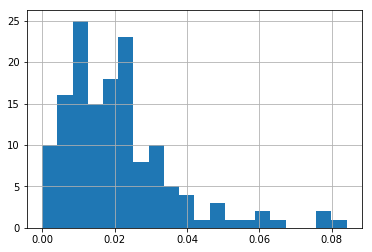

In [23]:
zgl['bledy_norm'].hist(bins = 20)
plt.show()